## 베이징 미세먼지 예측하기(회귀)
- 시계열 데이터 획득 및 전처리 pandas
- RNN 모델링 tensorflow

## 작업순서
1. 데이터 획득
1. 살펴보기
1. 데이터 정제- 누락데이터 처리
1. 전처리 - RNN 모델로 학습시킬 수 있도록 x,y를 만들기(교사학습)
1. 정규화 (0~1) - minmax
1. 학습용/테스트용 분리
1. RNN 모델을 구현
1. 학습데이터로 모델을 학습시키기
1. 성능 측정- 테스트 데이터셋, 결정계수
1. 시각화 - 정답과 예측

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [27]:
date_cols = ['year', 'month', 'day', 'hour']
df['Datetime'] = pd.to_datetime(df[date_cols])
df.set_index('Datetime', inplace=True)
df.drop(columns= date_cols + ['No'], inplace=True)

<Axes: ylabel='count'>

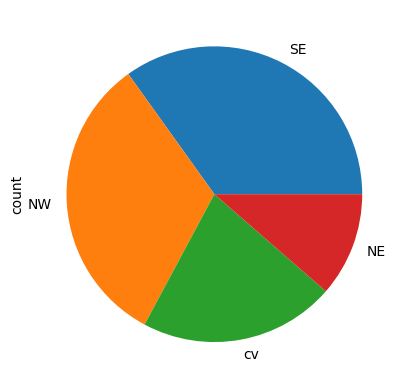

In [34]:
df['cbwd'].value_counts().plot.pie()

(43824, 8)

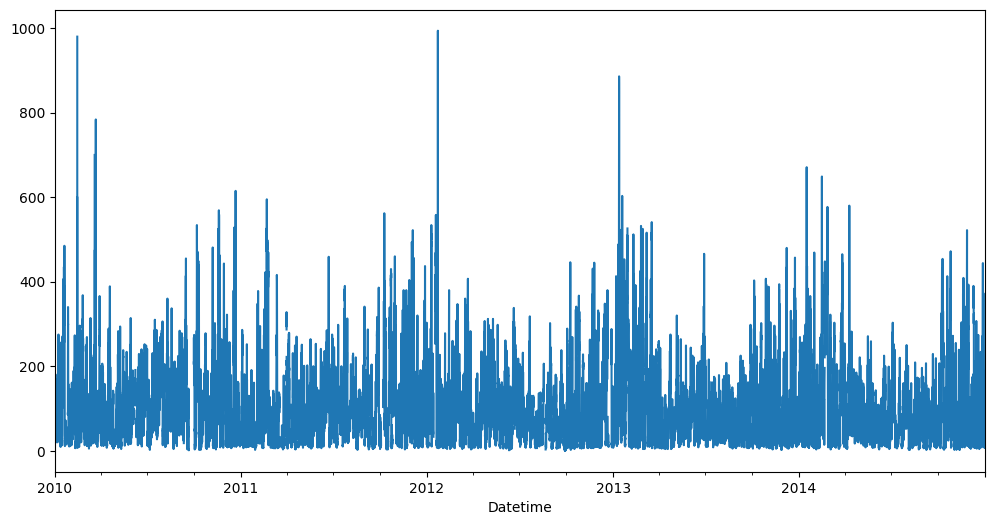

In [29]:
Target ='pm2.5'
df[Target].plot(figsize=(12,6))
df.shape

## 데이터 정제- 누락데이터 처리, 카테고리-> 수치형으로 변환

In [ ]:
df = df.dropna()

In [37]:
df_dummy = pd.get_dummies(df)
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41757 entries, 2010-01-02 00:00:00 to 2014-12-31 23:00:00
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pm2.5    41757 non-null  float64
 1   DEWP     41757 non-null  int64  
 2   TEMP     41757 non-null  float64
 3   PRES     41757 non-null  float64
 4   Iws      41757 non-null  float64
 5   Is       41757 non-null  int64  
 6   Ir       41757 non-null  int64  
 7   cbwd_NE  41757 non-null  bool   
 8   cbwd_NW  41757 non-null  bool   
 9   cbwd_SE  41757 non-null  bool   
 10  cbwd_cv  41757 non-null  bool   
dtypes: bool(4), float64(4), int64(3)
memory usage: 2.7 MB


<Axes: xlabel='Datetime'>

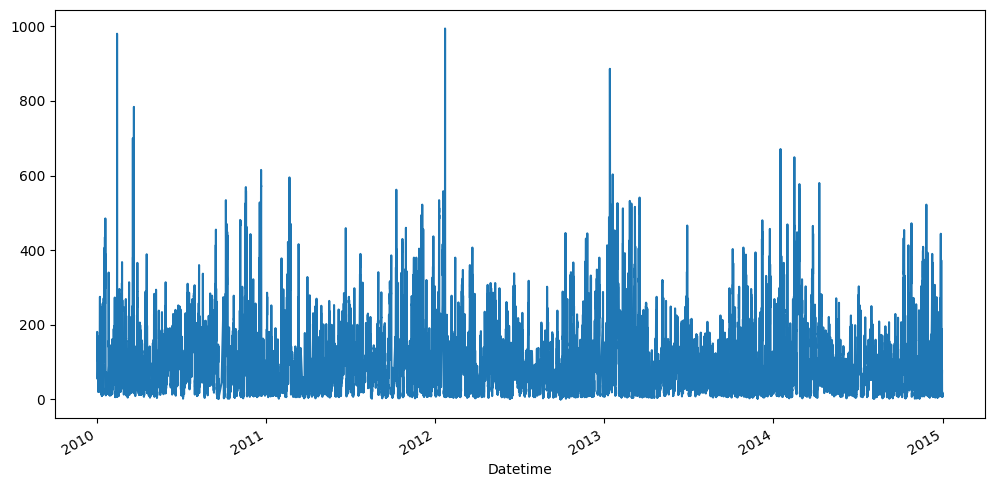

In [38]:
df[Target].plot(figsize=(12,6)) 